# Age classification using Multinomial Naive Bayes classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
 # Load your training dataset
train_data = pd.read_csv('/content/all_posts_train_with_age_col-2.csv', encoding='ISO-8859-1')

# Load your separate dataset for prediction (without age labels)
prediction_data = pd.read_csv('/content/all_posts_test_with_age_col-2.csv',encoding='ISO-8859-1')

# Define a function to extract part-of-speech tags and preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    filtered_tags = [tag for word, tag in tags if word.lower() not in stopwords.words('english')]
    return ' '.join(filtered_tags)

# Apply the preprocessing function to the training and prediction datasets
train_data['processed_data'] = train_data['Text'].apply(preprocess_text)
prediction_data['processed_data'] = prediction_data['Text'].apply(preprocess_text)



In [3]:
# Convert the training text data to a numerical representation using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['Text'])
y_train = train_data['Age']

# Create and train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Convert the prediction text data to the same numerical representation
X_pred = vectorizer.transform(prediction_data['Text'])

# Predict ages on the separate dataset
predicted_ages = clf.predict(X_pred)

# Add the predicted ages to the prediction dataset
prediction_data['predicted_age'] = predicted_ages

# Save the prediction results to a new CSV file
prediction_data.to_csv('predicted_ages.csv', index=False)


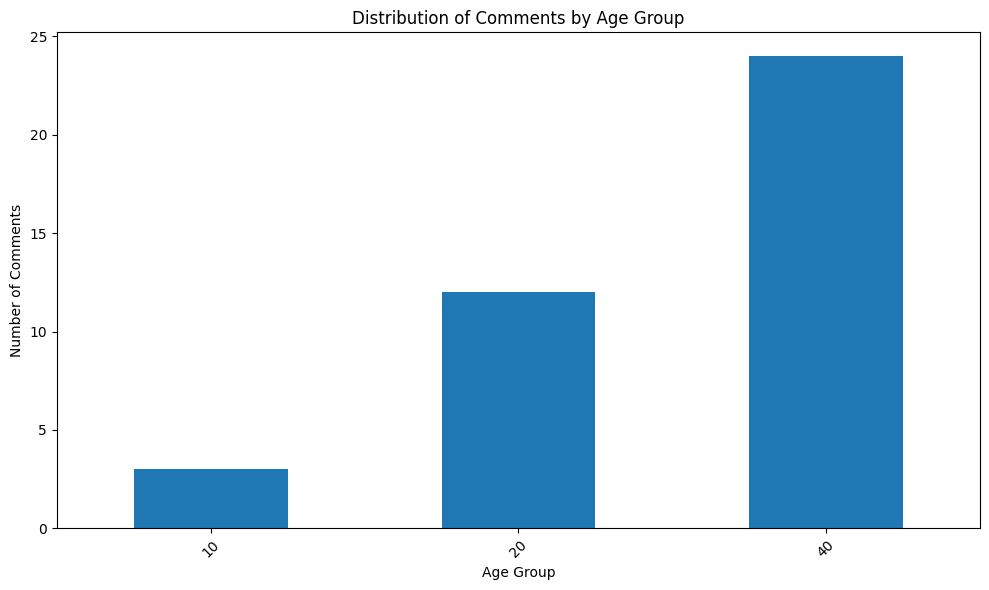

In [4]:
# Load the predicted ages dataset
predicted_data = pd.read_csv('predicted_ages.csv')

# Group the data by 'predicted_age' and count the number of comments in each age group
age_group_counts = predicted_data['predicted_age'].value_counts()

# Sort the age group counts by age
age_group_counts = age_group_counts.sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar')
plt.title('Distribution of Comments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()


# Show the plot
plt.show()

# Sentiment analysis over age groups